In [3]:
import numpy as np 
import statsmodels.api as sm
import pandas as pd 
import matplotlib.pyplot as plt



In [4]:
fed_interest = pd.read_csv('FEDFUNDS.csv', index_col= 0)
euro_interst = pd.read_csv('INTDSREZM193N.csv', index_col = 0)


fed_interest.index = pd.to_datetime(fed_interest.index, format = "%Y-%m-%d")

fed_interest['FED FUNDS PCT CHANGE'] = fed_interest['FEDFUNDS'].pct_change()
fed_interest['Intercept'] = 1 

euro_interst['EURO PCT CHANGE'] = euro_interst['INTDSREZM193N'].pct_change()
euro_interst['Intercept'] = 1 

fed_interest

,FEDFUNDS,FED FUNDS PCT CHANGE,Intercept
DATE,,,
1999-01-01,4.63,NaN,1
1999-02-01,4.76,0.028078,1
1999-03-01,4.81,0.010504,1
1999-04-01,4.74,-0.014553,1
1999-05-01,4.74,0.000000,1
...,...,...,...
2017-01-01,0.65,0.203704,1
2017-02-01,0.66,0.015385,1
2017-03-01,0.79,0.196970,1


In [5]:
dependent = fed_interest.loc["1999-02-01": , ['FED FUNDS PCT CHANGE']].reset_index()
independent = fed_interest.loc["1999-01-01" : "2017-04-01", ['FEDFUNDS', 'Intercept']].reset_index()

dependent = dependent[['FED FUNDS PCT CHANGE']]
independent = independent[['FEDFUNDS', 'Intercept']]

In [6]:
results = sm.regression.linear_model.OLS(dependent, independent)
results = results.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     FED FUNDS PCT CHANGE   R-squared:                       0.006
Model:                              OLS   Adj. R-squared:                  0.001
Method:                   Least Squares   F-statistic:                     1.308
Date:                  Tue, 15 Oct 2024   Prob (F-statistic):              0.254
Time:                          15:28:03   Log-Likelihood:                 112.69
No. Observations:                   220   AIC:                            -221.4
Df Residuals:                       218   BIC:                            -214.6
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
FEDFUNDS      -0.0053      0.005     -1.144      0.254      -0.014       0.004
Intercept      0.0139      0.013      1.039      0.300      -0.012       0.040
==============================================================================
Omnibus:                       81.054   Durbin-Watson:                   1.332
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1345.068
Skew:                           0.918   Prob(JB):                    8.36e-293
Kurtosis:                      14.973   Cond. No.                         4.16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

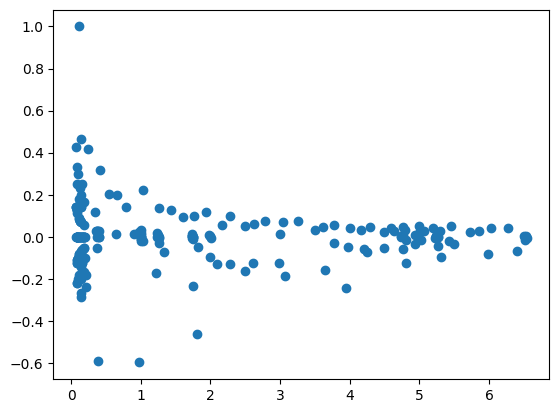

In [7]:
plt.scatter(independent['FEDFUNDS'], dependent)
plt.show()

In [24]:
residuals = results.resid
sigma = np.var(residuals,ddof=218)

In [18]:
steps_per_year=12
n_years = 5
dt = 1/steps_per_year
n_scenarios=100
n_steps = int(n_years*steps_per_year) + 1
xi = np.random.normal(loc = 0, scale = 1, size=(n_steps, n_scenarios))
xi

array([[-1.39969156,  1.01734145, -0.36585994, ...,  0.45264456,
        -0.14966926,  0.38288756],
       [-0.90045352,  0.79939443,  0.30320203, ..., -0.17809911,
         0.61244794, -1.8407138 ],
       [ 0.02526048,  0.75840676,  1.50194254, ...,  0.94793579,
         0.42109291, -0.71453595],
       ...,
       [ 0.40865326, -0.74554085, -1.11285487, ...,  2.05253296,
         0.48855872, -0.07409479],
       [-0.83705356,  0.78780394, -0.98404182, ...,  0.02212641,
         0.29262496, -0.91435825],
       [-1.73081776,  1.11975496, -2.44159875, ..., -0.86115359,
        -2.49174344, -1.56374841]])

<Axes: >

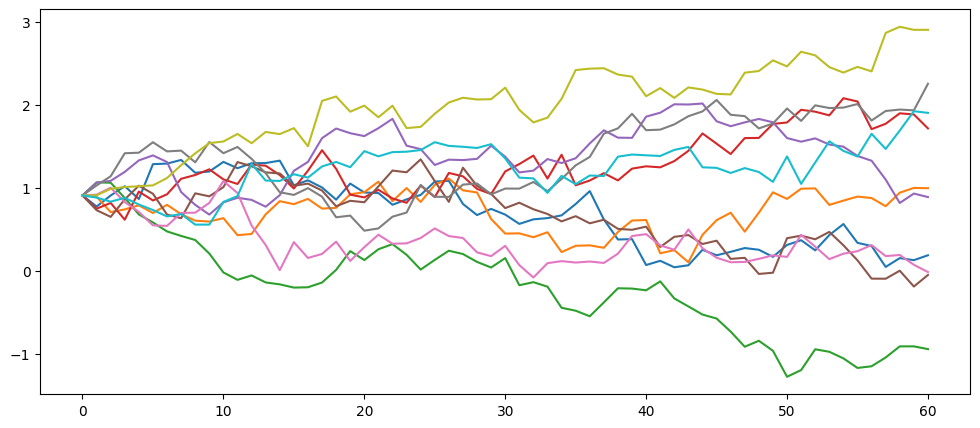

In [25]:


def Vasicek(n_years=5, n_scenarios=100, sigma=sigma, steps_per_year=12, s_0=0.91, prices=True):
    """
    Evolution of Vasicek trajectories, such as for interest rate through OLS Regression
    :param n_years:  The number of years to generate data for
    :param n_scenarios: The number of scenarios/trajectories
    :param sigma: Annualized Volatility
    :param steps_per_year: granularity of the simulation
    :param s_0: initial value
    :return: a numpy array of n_scenarios columns and n_years*steps_per_year rows
    """
    # Derive per-step Model Parameters from User Specifications
    dt = 1 / steps_per_year
    n_steps = int(n_years * steps_per_year) + 1
    xi = np.random.normal(loc=0, scale=1, size=(n_steps, n_scenarios))
    
    # Initialize the interest rate array
    rt = np.zeros((n_steps, n_scenarios))
    rt[0] = s_0
    
    # Generate the interest rate path
    for t in range(1, n_steps):
        rt_t_minus_1 = rt[t-1]
        mu = 0.0139 - (-0.0053* rt_t_minus_1)
        change = mu * dt + sigma  * xi[t]
        rt[t] = rt_t_minus_1 + change
    
    # Convert to DataFrame if needed
    if prices:
        rt = pd.DataFrame(rt)
    
    return rt



Vasicek(n_years=5, n_scenarios=10, sigma = 0.15, s_0 = 0.91, prices=True).plot(figsize = (12,5), legend = False)


In [185]:
dependent_euro = euro_interst.loc["1999-02-01": ,['INTDSREZM193N', 'Intercept']].reset_index()
dependent_euro = dependent_euro[['INTDSREZM193N', 'Intercept']]
dependent_euro

independent_euro = euro_interst.loc["1999-01-01" : "2017-04-01", ['EURO PCT CHANGE']].reset_index()
independent_euro = independent_euro[['EURO PCT CHANGE']]

In [186]:
results_euro = sm.regression.linear_model.OLS(dependent_euro, independent_euro)
results_euro = results_euro.fit()
results_euro.summary()

MissingDataError: exog contains inf or nans